### <font color = 'green'> ** Loan Eligibility Prediction using Machine Learning Models **

### Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

- ### df_ID--------------> Unique Loan ID.
- ### Gender --------------> Male/ Female
- ### Married --------------> Applicant married (Y/N)
- ### Dependents ------------> Number of dependents
- ### Education -------------> Applicant Education (Graduate/ Under Graduate)
- ### Self_Employed ---------> Self-employed (Y/N)
- ### ApplicantIncome -------> Applicant income
- ### CoapplicantIncome -----> Coapplicant income
- ### LoanAmount -----------> Loan amount in thousands
- ### Loan_Amount_Term ------> Term of a loan in months
- ### Credit_History --------> Credit history meets guidelines
- ### Property_Area ---------> Urban/ Semi-Urban/ Rural
- ### Loan_Status -----------> Loan approved (Y/N)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [21]:
df_train=pd.read_csv("D:/dataset/loan-train.csv")
df_test=pd.read_csv("D:/dataset/loan-test.csv")

In [22]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df_train.shape

(614, 13)

In [24]:
df_test.shape

(367, 12)

In [25]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [26]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [29]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)

df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)

df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)

df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(), inplace=True)

df_train['Credit_History'].fillna(df_train['Credit_History'].mean(), inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mean(), inplace=True)

In [32]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
df_train.Loan_Status = df_train.Loan_Status.replace({"Y": 1, "N" : 0}) 

df_train.Gender = df_train.Gender.replace({"Male": 1, "Female" : 0})
df_test.Gender = df_test.Gender.replace({"Male": 1, "Female" : 0})

df_train.Married = df_train.Married.replace({"Yes": 1, "No" : 0})
df_test.Married = df_test.Married.replace({"Yes": 1, "No" : 0})

df_train.Self_Employed = df_train.Self_Employed.replace({"Yes": 1, "No" : 0})
df_test.Self_Employed = df_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [35]:
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

In [36]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


C:\Users\ratnesh\AppData\Local\Temp\ipykernel_13768\3614934952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt='.1f')


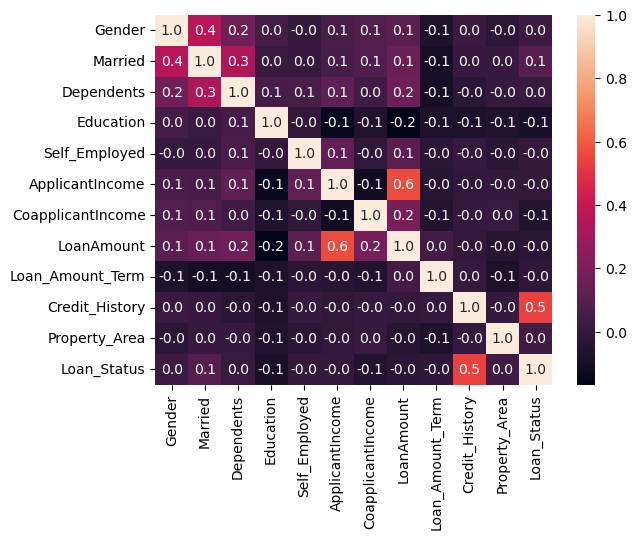

In [37]:
sns.heatmap(df_train.corr(), annot=True, fmt='.1f')
plt.show()

In [38]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = df_train[train_features].values
y_train = df_train['Loan_Status'].values
x_test = df_test[train_features].values

In [39]:
logistic_model = LogisticRegression()

In [40]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [41]:
predicted = logistic_model.predict(x_test)

In [44]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [42]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [45]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [46]:
y_predict=NBClassifier.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [52]:
score = NBClassifier.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94
